# Data Visualization on Heart Disease

# 1. Import necessary libraries and Get the data.

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting Data set.
df = pd.read_csv('heart.csv')

# Information Regarding Data set

Age: age of the patient [years]
    
Sex: sex of the patient [M: Male, F: Female]
    
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    
RestingBP: resting blood pressure [mm Hg]
    
Cholesterol: serum cholesterol [mm/dl]
    
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
                                               
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
                                               
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
                                               
Oldpeak: oldpeak = ST [Numeric value measured in depression]
                                               
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
                                               
HeartDisease: output class [1: heart disease, 0: Normal]

In [3]:
# Displays the first few rows.
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Displays all the columns with first 10 rows.
#check that the data loaded is in the correct format.
pd.set_option('display.max_columns', None)
print(df.head(10))

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1     

In [5]:
# How many rows and columns.
df.shape

(918, 12)

In [6]:
# Summary information about the dataset.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [7]:
# Summary statistics.
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


# 2. Data Preprocessing and Cleaning.

# Handling Missing Values

In [8]:
# Check for missing/null values.
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [9]:
# Percentage of null values.
df.isnull().sum()*100/len(df)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

#### No null values are present.

# Handling Duplicates

In [10]:
# Finding duplicate rows.
duplicates=df.duplicated()

if duplicates.any():
    print("Duplicates are present.")
else:
    print("No duplicates found.")


No duplicates found.


# Sanity Checks

In [11]:
def sanity_check_and_clean(df):
    # Define the valid ranges or categories for each column
    valid_ranges = {
        "Age": (0, 120),  # Age range
        "Sex": ["M", "F"],  # Sex should be either 'M' or 'F'
        "ChestPainType": ["TA", "ATA", "NAP", "ASY"],  # Valid chest pain types
        "RestingBP": (50, 200),  # Resting BP range
        "Cholesterol": (100, 600),  # Cholesterol level range
        "FastingBS": (0, 1),  # Fasting blood sugar should be 0 or 1
        "RestingECG": ["Normal", "ST", "LVH"],  # Valid RestingECG results
        "MaxHR": (60, 220),  # Max HR range
        "ExerciseAngina": ["Y", "N"],  # Exercise-induced angina should be 'Y' or 'N'
        "Oldpeak": (0.0, 10.0),  # Oldpeak value range
        "ST_Slope": ["Up", "Flat", "Down"],  # Valid ST slope types
        "HeartDisease": (0, 1)  # Heart disease output should be 0 or 1
    }
    
    # Dictionary to store outliers and their counts
    outliers_summary = {}
    
    for column, valid_range in valid_ranges.items():
        if isinstance(valid_range, tuple):
            # Numeric range check
            min_val, max_val = valid_range
            outlier_mask = (df[column] < min_val) | (df[column] > max_val)
        elif isinstance(valid_range, list):
            # Categorical check
            outlier_mask = ~df[column].isin(valid_range)
        
        # Count outliers
        num_outliers = outlier_mask.sum()
        
        if num_outliers > 0:
            outliers_summary[column] = num_outliers
            
        # Handle outliers (e.g., by removing them)
        df = df[~outlier_mask]

    return df, outliers_summary
    

df_cleaned, outliers_summary = sanity_check_and_clean(df)
print(outliers_summary)  # To see which columns contain outliers and how many
print("All outliers have been removed. The DataFrame is now cleaned.")

{'RestingBP': 1, 'Cholesterol': 173, 'Oldpeak': 1}
All outliers have been removed. The DataFrame is now cleaned.


### Cleaning is done.

# EDA - Exploratory Data Analysis.

## Distribution chart for Numerical columns

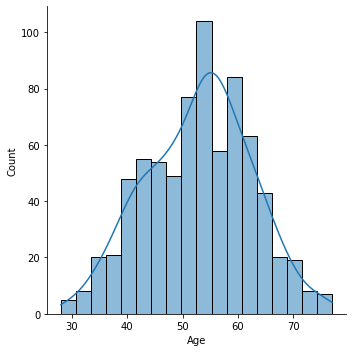

In [13]:
sns.displot(df_cleaned['Age'],kde= True)



The dataset contains a broad age range, but most individuals are middle-aged or older, which might be expected in a heart disease-related dataset. The distribution is symmetric, suggesting a balanced age representation in the sample.

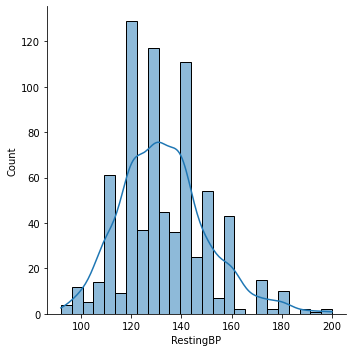

In [14]:
sns.displot(df_cleaned['RestingBP'],kde=True)

Most individuals in the dataset have a resting blood pressure between 120 and 150 mm Hg, which is within the expected range for many adults. There are fewer cases of very high (above 160) or very low (below 100) blood pressure.

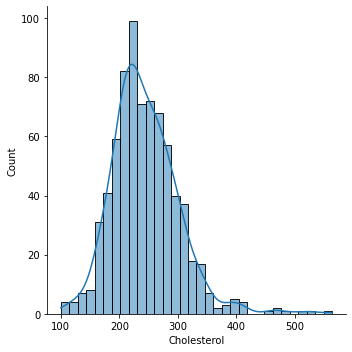

In [15]:
sns.displot(df_cleaned['Cholesterol'],kde=True)

The majority of individuals have cholesterol levels within the range of 200-300 mg/dL, which aligns with borderline to high cholesterol levels. The tail suggests some individuals have extremely high cholesterol levels (above 400 mg/dL), which could indicate hypercholesterolemia or outliers.

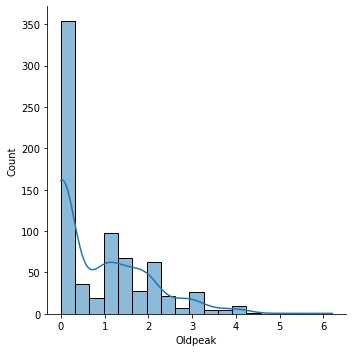

In [16]:
sns.displot(df_cleaned['Oldpeak'],kde=True)  

A significant portion of the dataset has low ST depression values, with few individuals showing higher values. This could indicate that most patients either have no significant ST depression or only mild depression, with fewer cases showing more severe conditions.

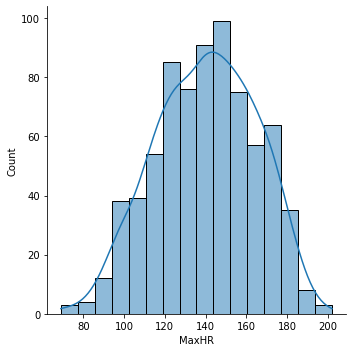

In [17]:
sns.displot(df_cleaned['MaxHR'],kde=True)

The histogram is approximately bell-shaped, indicating that MaxHR is normally distributed. The peak occurs around 140-160 bpm, where most individuals' heart rates are concentrated.

## Pie charts for Categorical columns

<AxesSubplot:ylabel='None'>

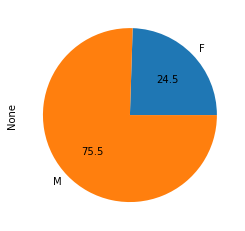

In [18]:
df_cleaned.groupby('Sex').size().plot(kind = 'pie', autopct = '%.1f')

This pie chart shows the distribution of individuals by gender. According to the chart:

75.5% of the individuals are male (M).

24.5% are female (F).

This chart indicates a larger representation of males in the dataset.

<AxesSubplot:ylabel='None'>

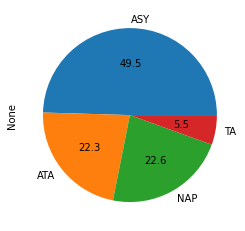

In [19]:
df_cleaned.groupby('ChestPainType').size().plot(kind = 'pie', autopct = '%.1f')

This pie chart represents the distribution of another categorical variable, possibly different conditions or categories:
    
ASY makes up 49.5% of the dataset.

NAP and ATA are almost equally represented at 22.6% and 22.3%, respectively.

TA is the least represented at 5.5%.

This chart shows that ASY is the most common category in the dataset.

<AxesSubplot:ylabel='None'>

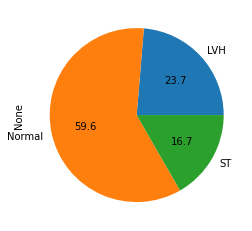

In [20]:
df_cleaned.groupby('RestingECG').size().plot(kind = 'pie', autopct = '%.1f')

This pie chart shows the distribution of a particular parameter, possibly related to medical data (e.g., ECG readings). A majority (59.6%) of cases fall under "Normal," followed by "LVH" and "ST," indicating the prevalence of these conditions within the data set.

<AxesSubplot:ylabel='None'>

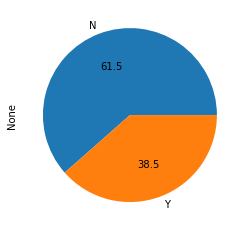

In [21]:
df_cleaned.groupby('ExerciseAngina').size().plot(kind = 'pie', autopct = '%.1f')

This pie chart could represent a binary classification, like a Yes/No or True/False scenario. The majority (61.5%) falls under "N," suggesting that most instances do not exhibit the characteristic or condition being measured, while 38.5% do.

<AxesSubplot:ylabel='None'>

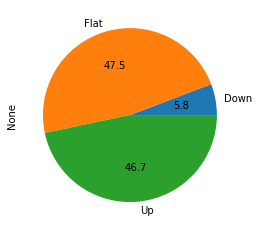

In [22]:
df_cleaned.groupby('ST_Slope').size().plot(kind = 'pie', autopct = '%.1f')

This chart shows the distribution of a variable that can take on three different states (e.g., trends in a time series or changes in a biological marker). The data is almost evenly split between "Flat" and "Up," with "Down" being the least common.

<AxesSubplot:ylabel='None'>

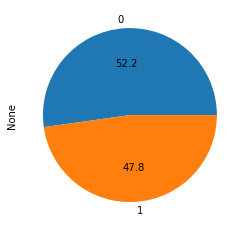

In [23]:
df_cleaned.groupby('HeartDisease').size().plot(kind = 'pie', autopct = '%.1f')

This pie chart could represent a binary classification, like a 0/1 scenario. In which 0 refers to normal person and 1 refers to person with Heart disease. 47.8% of the people have heart disease where as 52.2% don't.

# Violin Plot

<AxesSubplot:xlabel='Age'>

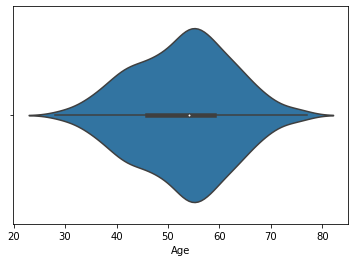

In [24]:
sns.violinplot(x=df_cleaned['Age'])

The age distribution is centered around 50-60 years, indicating that middle-aged individuals are the primary demographic in this dataset. The symmetrical spread suggests that age is evenly distributed across the sample.

<AxesSubplot:xlabel='HeartDisease', ylabel='Sex'>

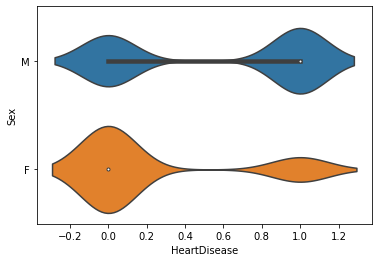

In [25]:
sns.violinplot(y='Sex', x='HeartDisease', data=df_cleaned)

Males have a more balanced distribution between having and not having heart disease, with a significant portion affected. In contrast, females show a stronger skew towards not having heart disease.

<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

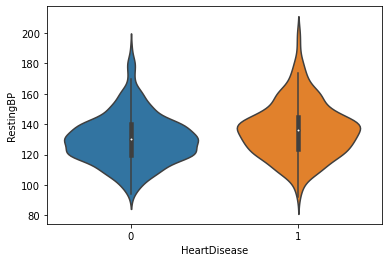

In [26]:
sns.violinplot(y='RestingBP', x='HeartDisease', data=df_cleaned)

Individuals with heart disease tend to have slightly higher resting blood pressure, with a broader spread in the values. This suggests that elevated blood pressure might be a risk factor for heart disease.

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

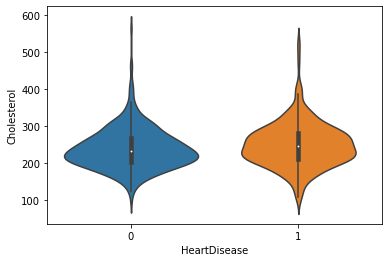

In [27]:
sns.violinplot(y='Cholesterol', x='HeartDisease', data=df_cleaned)

Cholesterol levels are slightly higher for those with heart disease, but the difference is not very pronounced. The distribution of cholesterol is relatively similar in both groups, indicating it's not a strong differentiator.

# To Find Correlation

## Heat Map

In [28]:
df_cleaned.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259558,0.057360,0.241519,-0.381803,0.285005,0.297774
RestingBP,0.259558,1.000000,0.096626,0.174227,-0.125658,0.197350,0.172222
Cholesterol,0.057360,0.096626,1.000000,0.034627,-0.014306,0.054704,0.093192
FastingBS,0.241519,0.174227,0.034627,1.000000,-0.100954,0.054485,0.157194
MaxHR,-0.381803,-0.125658,-0.014306,-0.100954,1.000000,-0.259205,-0.376589
Oldpeak,0.285005,0.197350,0.054704,0.054485,-0.259205,1.000000,0.494789
HeartDisease,0.297774,0.172222,0.093192,0.157194,-0.376589,0.494789,1.000000


The correlation matrix reveals that HeartDisease has the strongest positive correlation with Oldpeak (0.40), indicating that as the ST depression (Oldpeak) increases, the likelihood of heart disease also increases. Conversely, MaxHR has a strong negative correlation with HeartDisease (-0.40), suggesting that higher maximum heart rates are associated with a lower risk of heart disease. Additionally, Age is positively correlated with both HeartDisease (0.28) and RestingBP (0.25), indicating that older age is linked to higher blood pressure and a higher risk of heart disease.

<AxesSubplot:>

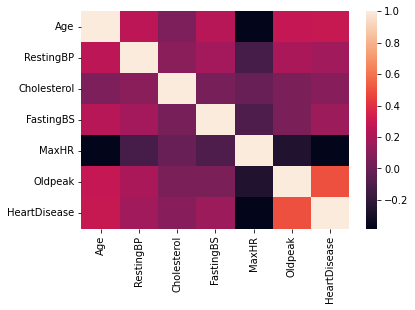

In [29]:
sns.heatmap(df_cleaned.corr())

The heatmap reveals correlations between various health factors. Heart disease shows a positive correlation with age and Oldpeak, and a negative correlation with MaxHR, while other variables such as RestingBP, cholesterol, and fasting blood sugar exhibit weaker correlations with one another.

## Joint Plot

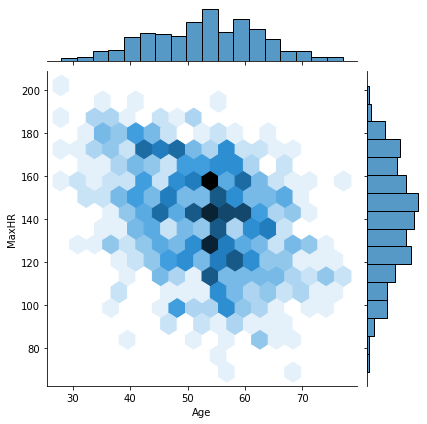

In [30]:
sns.jointplot(x='Age', y='MaxHR', data=df_cleaned , kind= 'hex')

This graph shows that MaxHR generally decreases with age, with most data points clustered around middle age and moderate MaxHR values. The densest regions of the plot, represented by darker hexagons, indicate that the majority of individuals are in the 40-60 age range with MaxHR values between 120-160.

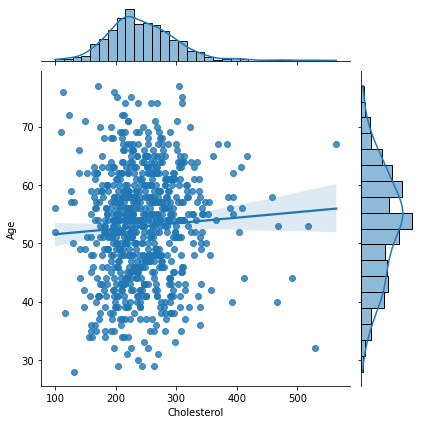

In [31]:
sns.jointplot(x='Cholesterol', y='Age', data=df_cleaned ,kind= 'reg')

The scatter plot shows a weak positive correlation between age and cholesterol, meaning that cholesterol levels tend to increase slightly with age. The data is widely dispersed, indicating that cholesterol levels vary significantly among individuals of the same age.

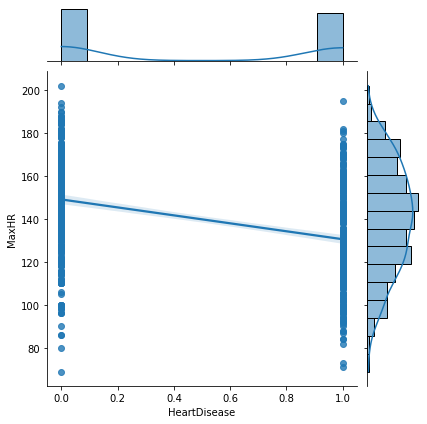

In [32]:
sns.jointplot(x='HeartDisease', y='MaxHR', data=df_cleaned , kind= 'reg')

 This graph suggests that individuals with heart disease (denoted by 1) tend to have a lower MaxHR compared to those without heart disease (denoted by 0). The downward trend line reinforces this slight negative correlation between MaxHR and the presence of heart disease.

## Pair Plot

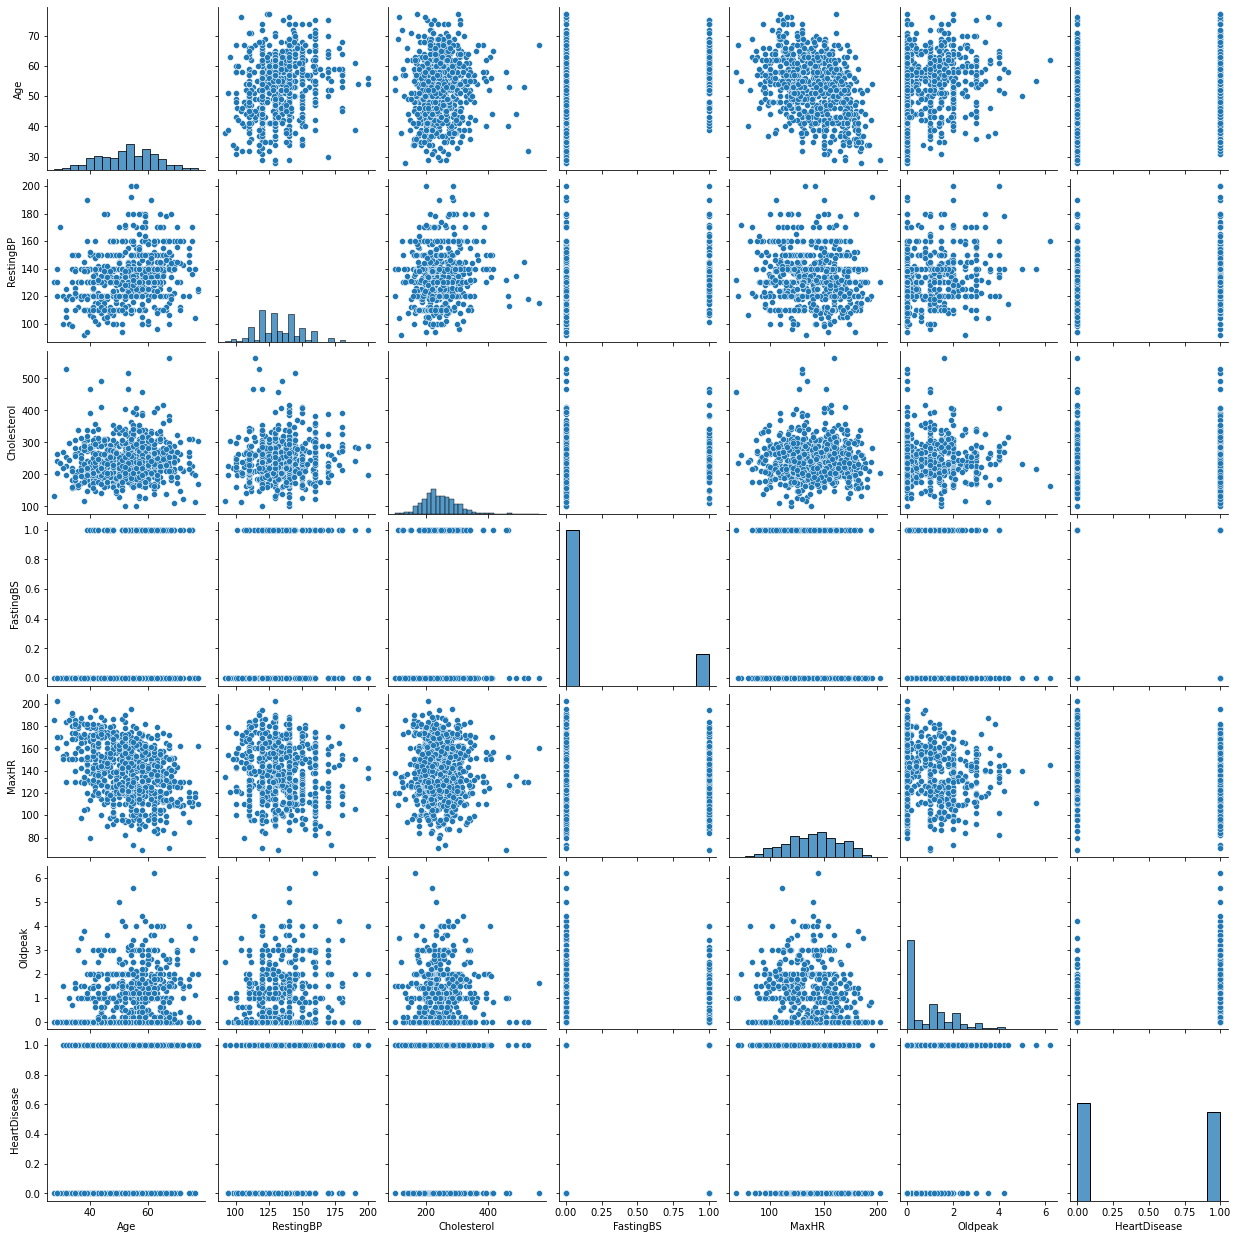

In [35]:
sns.pairplot(df_cleaned)

The pair plot shows weak correlations among most variables, with a slight negative trend between Age and MaxHR. Binary variables like FastingBS, ExerciseInducedAngina, and HeartDisease show distinct splits, while other variables like Cholesterol and RestingBP are widely dispersed with no clear linear relationships. The data overall indicates low linear correlations between variables.